# For this notebook please first download and extract the data and save the data in the directory specified in "data_location". Note that depending on how much data is in the location it might take very long and also need lots of RAM.

In [3]:
data_location = "selected_data"
save_to = "reduced_21_data"

In [1]:
#Imports
import os
from os.path import join
from datetime import datetime

import pandas as pd
import dask
import dask.dataframe as dd




In [1]:
%%time
import utils.preprocess as preprocess
import utils.config as config
from dask.distributed import progress

config = config.load_config("mach2_train_config.yaml")

ddf, delayed_dump, other_delayed = preprocess.preprocess(config)

Outputting preprocessed files
Compute environment established: <Client: 'tcp://127.0.0.1:50179' processes=2 threads=4, memory=7.45 GiB>
The uncompressed dataset is saved to the disk.
The following preprocessed columns can be dumped:  ['tweet_id', 'a_is_verified', 'b_user_id', 'b_is_verified', 'a_follows_b', 'has_reply', 'bert_token_len', 'has_retweet', 'has_retweet_comment', 'has_like', 'n_photos', 'n_videos', 'n_gifs', 'type_encoding', 'language_encoding', 'a_followers', 'a_following', 'b_followers', 'b_following', 'day_of_week', 'hour_of_day', 'b_creation_delta', 'a_creation_delta', 'tweet_hash', 'b_hash', 'a_hash', 'TE_language_encoding_has_reply', 'TE_language_encoding_has_like', 'TE_language_encoding_has_retweet_comment', 'TE_language_encoding_has_retweet', 'TE_type_encoding_has_reply', 'TE_type_encoding_has_like', 'TE_type_encoding_has_retweet_comment', 'TE_type_encoding_has_retweet']
Feature generation ready, manifest dumped, associated delayed objects: Dask DataFrame Structure:

In [2]:
%%time

import utils.compute_and_front as compute
with compute.get_dask_compute_environment() as client:
        f = client.persist(delayed_dump)
        progress(f)
        f.compute()

Compute environment established: <Client: 'tcp://127.0.0.1:50229' processes=2 threads=4, memory=7.45 GiB>
Wall time: 6min 50s


In [3]:
%%time#Really Slow (because things are done redundently in the process tree)
with compute.get_dask_compute_environment() as client:
    for delayed in other_delayed:
        f = client.persist(delayed)
        progress(f)
        f.compute()

Compute environment established: <Client: 'tcp://127.0.0.1:50370' processes=2 threads=4, memory=7.45 GiB>
Wall time: 40min 28s


In [1]:
%%time
import utils.preprocess as preprocess
import utils.config
from dask.distributed import progress
config = utils.config.load_config("mach2_test_config.yaml")

ddf, delayed_dump, other_delayed = preprocess.preprocess(config)

Outputting preprocessed files
Compute environment established: <Client: 'tcp://127.0.0.1:60786' processes=2 threads=4, memory=7.45 GiB>
The uncompressed dataset is saved to the disk.




The following preprocessed columns can be dumped:  ['tweet_id', 'a_is_verified', 'b_user_id', 'b_is_verified', 'a_follows_b', 'bert_token_len', 'n_photos', 'n_videos', 'n_gifs', 'type_encoding', 'language_encoding', 'a_followers', 'a_following', 'b_followers', 'b_following', 'day_of_week', 'hour_of_day', 'b_creation_delta', 'a_creation_delta', 'tweet_hash', 'b_hash', 'a_hash', 'TE_language_encoding_has_reply', 'TE_language_encoding_has_like', 'TE_language_encoding_has_retweet_comment', 'TE_language_encoding_has_retweet', 'TE_type_encoding_has_reply', 'TE_type_encoding_has_like', 'TE_type_encoding_has_retweet_comment', 'TE_type_encoding_has_retweet']
Feature generation ready, manifest dumped, associated delayed objects: Dask DataFrame Structure:
               bert_base_multilingual_cased_tokens hashtag

In [2]:
%%time
import utils.compute_and_front as compute
with compute.get_dask_compute_environment() as client:
        f = client.persist(delayed_dump)
        progress(f)
        f.compute()

Compute environment established: <Client: 'tcp://127.0.0.1:60916' processes=2 threads=4, memory=7.45 GiB>
Wall time: 2min 6s


In [3]:
import pandas as pd
pd.read_parquet("preprocessed_validation_features\\part.5.parquet")

,tweet_id,a_is_verified,b_user_id,b_is_verified,a_follows_b,bert_token_len,n_photos,n_videos,n_gifs,type_encoding,...,b_hash,a_hash,TE_language_encoding_has_reply,TE_language_encoding_has_like,TE_language_encoding_has_retweet_comment,TE_language_encoding_has_retweet,TE_type_encoding_has_reply,TE_type_encoding_has_like,TE_type_encoding_has_retweet_comment,TE_type_encoding_has_retweet
idx,,,,,,,,,,,,,,,,,,,,,
1291757,22CC98A0288262B3E813EDEC050D783C,False,FC07905C89470B551AB1B20CAC201F88,False,False,3.871201,0.000000,0.000000,0.0,3,...,5221199295436911194,8036735432813318446,0.028109,0.385207,0.007687,0.079282,0.040629,0.484113,0.007656,0.077687
1291758,7ADE37CF14650A1E895C884D3D9C7D19,False,6D2269C322A31AA23BECBEEB0BE8E66A,False,True,3.688879,0.000000,0.693147,0.0,0,...,3164272874088043420,4105263239662179244,0.028109,0.385207,0.007687,0.079282,0.005744,0.247424,0.005996,0.112499
1291759,8C75F477F947495F2858DBF0033B008D,False,C9AD69FC2D8D73CF70F993B3DD01F02A,False,False,3.332205,0.000000,0.693147,0.0,0,...,4522555600851021210,1590452100478707250,0.018832,0.417308,0.006443,0.081725,0.005744,0.247424,0.005996,0.112499
1291760,5E921C733E80E38AECA3285FF3AFF9CD,False,9D9B65D744360D5039D23941A903FE61,False,True,3.465736,0.000000,0.693147,0.0,0,...,1994712128081330303,1265362263202565858,0.014777,0.340397,0.008662,0.147723,0.005744,0.247424,0.005996,0.112499
1291761,F1384C23AF802B2C2EA48321BFC4CAD7,False,C1DE41EEF039A65D8B7E04DF56D3C486,False,False,3.218876,0.000000,0.000000,0.0,1,...,7046527720201065383,5629935827588143464,0.028109,0.385207,0.007687,0.079282,0.033151,0.360734,0.005794,0.054292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550557,6A138F53C7EFB9A69F55DE5BF2D588C0,False,640910B82D7DE3CE909CED36F55AACCA,False,False,3.332205,0.000000,0.000000,0.0,0,...,1617254490414437086,5347241945078641795,0.064841,0.390789,0.006844,0.083544,0.005744,0.247424,0.005996,0.112499
1550558,4F5CCDD43D7ADD61A1F2438D53C04323,False,D9A9CC5E1C1FB630BE5918483FC780E3,False,False,2.708050,0.000000,0.000000,0.0,3,...,6525792024023395319,8822451879770240571,0.028109,0.385207,0.007687,0.079282,0.040629,0.484113,0.007656,0.077687
1550559,38BACCDD34A403C9417B047BC26CADD7,True,1F4397BA3584BA63C45765B98BC8C017,False,False,3.713572,0.000000,0.000000,0.0,0,...,2896926341712634752,3180252973331060513,0.028109,0.385207,0.007687,0.079282,0.005744,0.247424,0.005996,0.112499


In [91]:
df.columns

Index(['tweet_id', 'a_is_verified', 'b_user_id', 'b_is_verified',
       'a_follows_b', 'has_reply', 'bert_token_len', 'has_retweet',
       'has_retweet_comment', 'has_like', 'n_photos', 'n_videos', 'n_gifs',
       'reply_age', 'type_encoding', 'language_encoding', 'a_followers',
       'a_following', 'b_followers', 'b_following', 'day_of_week',
       'hour_of_day', 'b_creation_delta', 'a_creation_delta', 'tweet_hash',
       'b_hash', 'a_hash', 'TE_language_encoding_has_reply',
       'TE_language_encoding_has_like',
       'TE_language_encoding_has_retweet_comment',
       'TE_language_encoding_has_retweet', 'TE_type_encoding_has_reply',
       'TE_type_encoding_has_like', 'TE_type_encoding_has_retweet_comment',
       'TE_type_encoding_has_retweet', 'TE_tweet_hash_has_reply',
       'TE_tweet_hash_has_like', 'TE_tweet_hash_has_retweet_comment',
       'TE_tweet_hash_has_retweet', 'TE_b_hash_has_reply',
       'TE_b_hash_has_like', 'TE_b_hash_has_retweet_comment',
       'TE_b_has

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_parquet("preprocessed_features\\part.2.parquet")
X_df = df[['a_is_verified', 'b_is_verified',
       'a_follows_b', 'bert_token_len', 'n_photos', 'n_videos', 'n_gifs',
       'type_encoding', 'language_encoding', 'a_followers',
       'a_following', 'b_followers', 'b_following', 'day_of_week',
       'hour_of_day', 'b_creation_delta', 'a_creation_delta',
       'TE_language_encoding_has_reply',
       'TE_language_encoding_has_like',
       'TE_language_encoding_has_retweet_comment',
       'TE_language_encoding_has_retweet', 'TE_type_encoding_has_reply',
       'TE_type_encoding_has_like', 'TE_type_encoding_has_retweet_comment',
       'TE_type_encoding_has_retweet']]
X = X_df.to_numpy()

Y= df["has_like"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15)

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 20, verbose = 10, n_jobs = 4, class_weight="balanced")
rfc.fit(np.nan_to_num(np.array(X_train, dtype=float)), Y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.1s
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.7s
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.0s
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.8s
building tree

RandomForestClassifier(class_weight='balanced', max_depth=20, n_jobs=4,
                       verbose=10)

In [119]:
y_hat = rfc.predict(np.nan_to_num(np.array(X_test, dtype=float)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [113]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
print(accuracy_score(Y_test,y_hat))
print(balanced_accuracy_score(Y_test, y_hat))

0.8393957361243587
0.5389367293634241


In [5]:
import pandas as pd

In [9]:
st = "C789139E04D060218D1FF0D3637FC51E"

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc = DecisionTreeClassifier()
dtc.fit(np.nan_to_num(np.array(X_train, dtype=float)), Y_train)
y_hat = dtc.predict(np.nan_to_num(np.array(X_test, dtype=float)))

In [123]:
dtc.tree_.compute_feature_importances(normalize=True)

array([0.00910362, 0.00019635, 0.00521936, 0.08744459, 0.01323359,
       0.00462509, 0.00186938, 0.        , 0.01196485, 0.10836241,
       0.10549077, 0.10078048, 0.10765432, 0.04308808, 0.06839164,
       0.11628186, 0.10941547, 0.0130312 , 0.01909383, 0.01258962,
       0.01271891, 0.        , 0.        , 0.04944459, 0.        ])

In [107]:
len(df) - len(set(df["b_hash"]))

13229

In [124]:
X_df.columns

Index(['a_is_verified', 'b_is_verified', 'a_follows_b', 'bert_token_len',
       'n_photos', 'n_videos', 'n_gifs', 'type_encoding', 'language_encoding',
       'a_followers', 'a_following', 'b_followers', 'b_following',
       'day_of_week', 'hour_of_day', 'b_creation_delta', 'a_creation_delta',
       'TE_language_encoding_has_reply', 'TE_language_encoding_has_like',
       'TE_language_encoding_has_retweet_comment',
       'TE_language_encoding_has_retweet', 'TE_type_encoding_has_reply',
       'TE_type_encoding_has_like', 'TE_type_encoding_has_retweet_comment',
       'TE_type_encoding_has_retweet'],
      dtype='object')

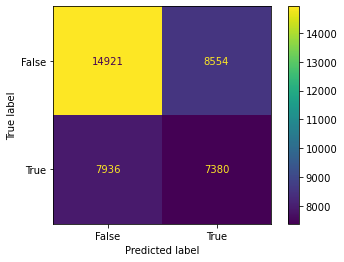

In [122]:
import sklearn
sklearn.metrics.plot_confusion_matrix(dtc, np.nan_to_num(np.array(X_test, dtype=float)), Y_test)